In [14]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.io import imread,imshow
import sys

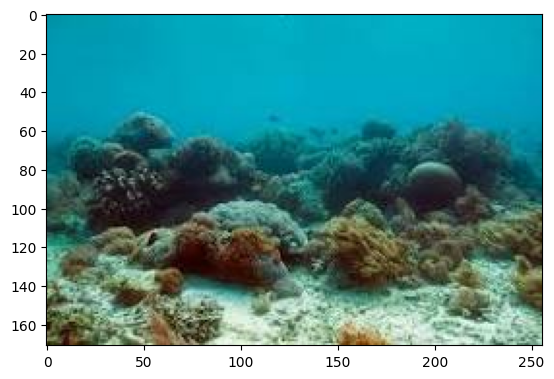

In [15]:
#Gray world algorithm
img=cv2.imread('/Users/s5284664/Desktop/PAPERS/haze_img.jpeg')
i=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(i)



In [16]:
def fuc_white_balnc(img):
    imga_lab=cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
    avga=np.average(imga_lab[:,:,1])
    avgb=np.average(imga_lab[:,:,2])
    imga_lab[:,:,1]=imga_lab[:,:,1]-((avga-128)*(imga_lab[:,:,0]/255.0)*1.2)
    imga_lab[:,:,2]=imga_lab[:,:,2]-((avgb-128)*(imga_lab[:,:,0]/255.0)*1.2)
    balanced_img=cv2.cvtColor(imga_lab,cv2.COLOR_LAB2BGR)
    return balanced_img

In [17]:
enhanced_img=fuc_white_balnc(img)
enhanced_img=cv2.cvtColor(enhanced_img,cv2.COLOR_BGR2RGB)

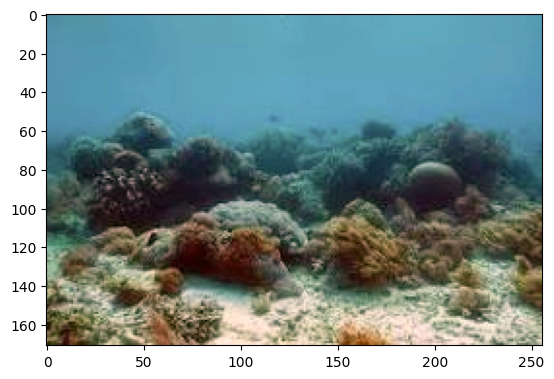

In [18]:
plt.imshow(enhanced_img)

Text(0.5, 1.0, 'Whitebalanced Image')

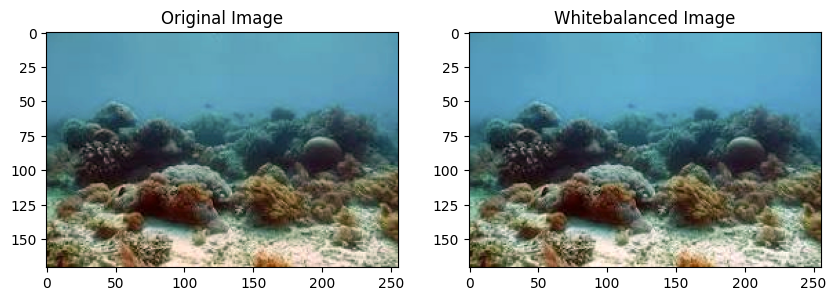

In [25]:
#White patch algorithm
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(enhanced_img)
ax[0].set_title('Original Image')
white_balcd = (enhanced_img*1.0 / enhanced_img.max(axis=(0,1)))
ax[1].imshow(white_balcd);
ax[1].set_title('Whitebalanced Image')

In [26]:
#Ground truth algorithm
from matplotlib.patches import Rectangle

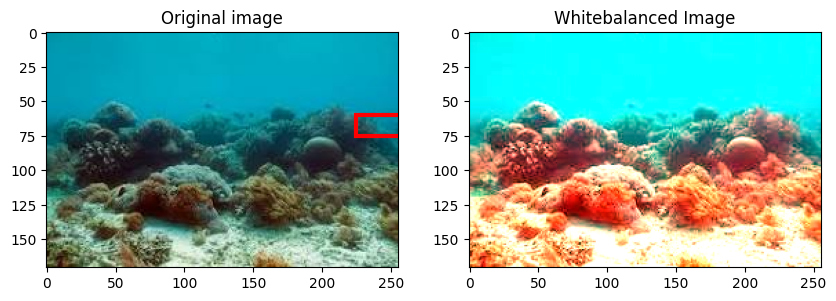

In [33]:
def whitepatch_balancing(img, from_row, from_column, 
                         row_width, column_width):
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].imshow(img)
    ax[0].add_patch(Rectangle((from_column, from_row), 
                              column_width, 
                              row_width, 
                              linewidth=3,
                              edgecolor='r', facecolor='none'));
    ax[0].set_title('Original image')
    image_patch = img[from_row:from_row+row_width, 
                        from_column:from_column+column_width]
    image_max = (img*1.0 / 
                 image_patch.max(axis=(0, 1))).clip(0, 1)
    ax[1].imshow(image_max);
    ax[1].set_title('Whitebalanced Image')
whitepatch_balancing(i, 60, 225, 15, 225)